# Economic Analysis Project

Importing Necessary Library - API Setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

#installing Libraries some other important libraries for project
#1. pip install fredapi
#2. pip install plotly

pd.set_option("display.max_columns", 500)
plt.style.use('fivethirtyeight')

# API Key Importing
from dotenv import load_dotenv
import os

load_dotenv()
fred_api_key = os.getenv("API_KEY")


### 1. Create the 'FRED' Object.
- This object will be used to search and pull data from website.
- Fred allows us to do search the data and pull down the data.

In [13]:
fred = Fred(api_key=fred_api_key)
fred

### 2. Searching for Economic Data
- This search is similar to how we search on website searchbar but its more pythonic and in pandas.
- we will use `object.search` for economic data.
- Search Results are sorted by 'popularity'

In [20]:
s_p_search = fred.search('S&P', order_by='popularity')
s_p_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-02,2026-02-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:39-06:00,99,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-02,2026-02-02,S&P 500,2016-02-01,2026-01-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-01-30 19:02:01-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-02,2026-02-02,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,86,"For more information regarding the index, plea..."
BAMLC0A0CM,BAMLC0A0CM,2026-02-02,2026-02-02,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:15:43-06:00,84,The ICE BofA Option-Adjusted Spreads (OASs) ar...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-02,2026-02-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:44-06:00,84,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EMPENGESA148NRUG,EMPENGESA148NRUG,2026-02-02,2026-02-02,Number of Persons Engaged for Spain,1950-01-01,2019-01-01,Annual,A,Millions of Persons,Mil. of Persons,Not Seasonally Adjusted,NSA,2021-01-21 13:33:48-06:00,4,Source ID: emp When using these data in your ...
RKNANPBIA666NRUG,RKNANPBIA666NRUG,2026-02-02,2026-02-02,Capital Stock at Constant National Prices for ...,1960-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2023-02-27 14:33:06-06:00,4,Source ID: rkna When using these data in your...
XRNCUSHRA618NRUG,XRNCUSHRA618NRUG,2026-02-02,2026-02-02,Exchange Rate (market+estimated) for Croatia,1990-01-01,2019-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2021-01-21 13:31:48-06:00,4,Source ID: xr When using these data in your r...


In [19]:
s_p_search.shape

(1000, 15)

In [24]:
s_p_search.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2026-02-02,2026-02-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:39-06:00,99,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2026-02-02,2026-02-02,S&P 500,2016-02-01,2026-01-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-01-30 19:02:01-06:00,91,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2026-02-02,2026-02-02,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2026-01-27 08:15:25-06:00,86,"For more information regarding the index, plea..."
BAMLC0A0CM,BAMLC0A0CM,2026-02-02,2026-02-02,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:15:43-06:00,84,The ICE BofA Option-Adjusted Spreads (OASs) ar...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2026-02-02,2026-02-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2026-01-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2026-02-02 10:14:44-06:00,84,This data represents the effective yield of th...
DJIA,DJIA,2026-02-02,2026-02-02,Dow Jones Industrial Average,2016-02-01,2026-01-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2026-01-30 19:03:26-06:00,77,The observations for the Dow Jones Industrial ...
CSUSHPISA,CSUSHPISA,2026-02-02,2026-02-02,S&P Cotality Case-Shiller U.S. National Home P...,1987-01-01,2025-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2026-01-27 08:15:29-06:00,73,"For more information regarding the index, plea..."
STLENI,STLENI,2026-02-02,2026-02-02,St. Louis Fed Economic News Index: Real GDP No...,2013-04-01,2025-10-01,Quarterly,Q,Percent Change at Annual Rate,% Chg. at Annual Rate,Seasonally Adjusted Annual Rate,SAAR,2026-01-30 09:50:27-06:00,73,St. Louis Fed’s Economic News Index (ENI) uses...
MEHOINUSA646N,MEHOINUSA646N,2026-02-02,2026-02-02,Median Household Income in the United States,1984-01-01,2024-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2025-09-09 13:19:03-05:00,73,Household data are collected as of March. As ...


### Pulling Raw Data And Plotting

<Axes: title={'center': 'S&P 500'}>

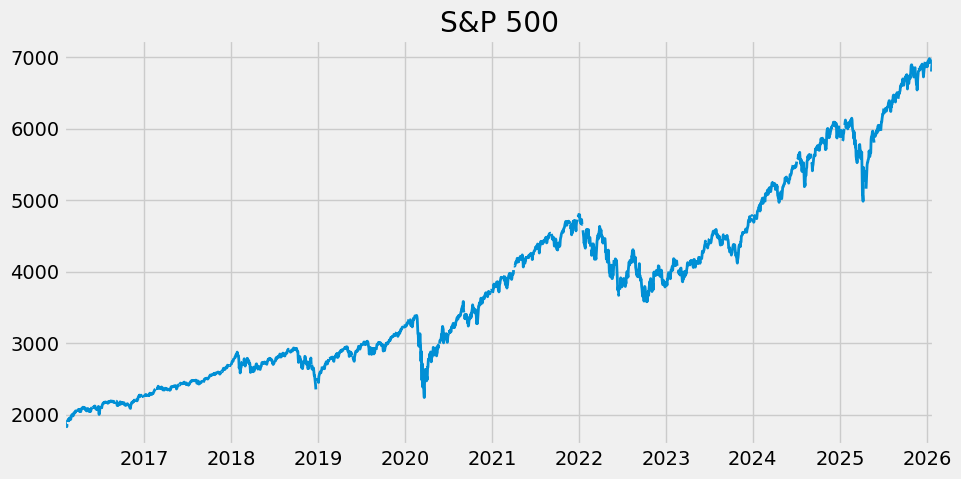

In [31]:
# Pulling using object.get_series and providing id of series
sp500_data = fred.get_series(series_id='SP500')

# Plotting 
sp500_data.plot(figsize=(10,5), title='S&P 500', linewidth=2)